In [119]:
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from seisflows.tools import specfem

P_SV = str(specfem.getpar(key='P_SV', file='./specfem2d_workdir/DATA/Par_file')[1])
wavefield_files = sorted(pathlib.Path('./specfem2d_workdir/OUTPUT_FILES').glob('wavefield000*.txt'))

wavefield_x = []
data = []
wavefield_z = []

for file in wavefield_files:
    data = np.loadtxt(file)
    # 
    if data.ndim == 1:
        data.append(data)
    else:
        wavefield_x.append(data[:, 0])
        wavefield_z.append(data[:, 1])

wavefield_x = np.array(wavefield_x)
data = np.array(data)
wavefield_z = np.array(wavefield_z)


xy = np.loadtxt('./specfem2d_workdir/OUTPUT_FILES/wavefield_grid_for_dumps.txt')
x, y = xy[:, 0], xy[:, 1]


In [120]:
def grid(x, y, z, resX=100, resY=100):
    """
    Converts 3 column data to matplotlib grid
    """
    #griddata deprecated since matplotlib 3.1: from matplotlib.mlab import griddata
    from scipy.interpolate import griddata

    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)

    # mlab version
    #Z = griddata(x, y, z, xi, yi, interp='linear')
    # scipy version
    Z = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

In [121]:
if P_SV:
    data = wavefield_z
else:
    data = data

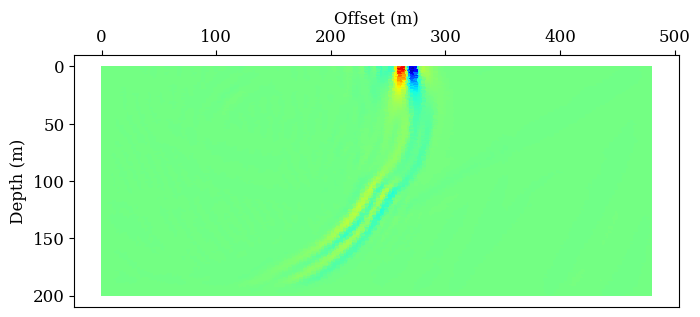

In [122]:
z = data[8]
vmin = z.min()
vmax = z.max()

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12

size_x = x.max() - x.min()
size_y = y.max() - y.min()
scale = 8.0
figsize = (scale, scale*size_y/size_x) if size_x > size_y else (scale*size_x/size_y, scale)

fig, ax = plt.subplots(1, 1, figsize=figsize)


# ax.imshow(Z, cmap='gray', aspect='auto', 
#           extent=[x.min(), x.max(), y.max(), y.min()],
#           interpolation='spline16')
# ax.pcolormesh(X, Y, Z, cmap='seismic')

im = ax.tripcolor(x, y, z, cmap='jet', vmin=vmin, vmax=vmax)

ax.set_xlabel('Offset (m)')
ax.set_ylabel('Depth (m)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')  # 将x轴的标签也移动到顶部
ax.set_aspect('equal')
ax = plt.gca()                      #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')  #将X坐标轴移到上面
ax.invert_yaxis()                   #反转Y坐标轴
fig.tight_layout()
plt.show()

In [123]:

## save wavefield
vmin = data.min() / 10
vmax = data.max() / 10
for i in range(0, len(data)):
    # X, Y, Z = grid(x, y, data[i])
    z = data[i]
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams['font.size'] = 12

    size_x = x.max() - x.min()
    size_y = y.max() - y.min()
    scale = 8.0
    figsize = (scale, scale*size_y/size_x) if size_x > size_y else (scale*size_x/size_y, scale)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    im = ax.tripcolor(x, y, z, cmap='rainbow', vmin=vmin, vmax=vmax)
    ax.set_xlabel('Offset (m)')
    ax.set_ylabel('Depth (m)')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')  # 将x轴的标签也移动到顶部
    ax.set_aspect('equal')
    ax = plt.gca()                      #获取到当前坐标轴信息
    ax.xaxis.set_ticks_position('top')  #将X坐标轴移到上面
    ax.invert_yaxis()                   #反转Y坐标轴
    fig.tight_layout()

    plt.savefig(f'./wavefield/wavefield_y_{i:03d}.png')
    plt.close()

In [124]:
## create gif

from PIL import Image
import pathlib

def create_gif(folder_path, output_path, duration=800):
    images = []
    # 获取文件夹内所有图片文件
    for file_name in sorted(pathlib.Path(folder_path).glob('*.png')):
        image = Image.open(file_name)
        images.append(image)
    
    # 保存成GIF文件
    images[0].save(
        output_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )

# 调用函数
create_gif('./wavefield', 'output.gif')


In [ ]:
## convert .ps to .pdf

# gs -dNOPAUSE -dBATCH -sDEVICE=pdfwrite -sOutputFile=output.pdf ./OUTPUT_FILES/vect0002000.ps 